In [4]:
import pickle
import numpy as np

In [5]:
x=pickle.load(open("x.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

In [6]:
type(x)

numpy.ndarray

In [25]:
y=np.array(y)

In [8]:
# First of all we will import all the necessary libraries of keras or any other framework//.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation

In [9]:
print(len(x))

24946


In [10]:
x=x/255.0
print (len(x))
print(x.shape[1:])
print (x)

24946
(50, 50, 1)
[[[[0.35686275]
   [0.35294118]
   [0.34117647]
   ...
   [0.58431373]
   [0.58039216]
   [0.34509804]]

  [[0.38039216]
   [0.38039216]
   [0.36862745]
   ...
   [0.58823529]
   [0.43529412]
   [0.25098039]]

  [[0.4       ]
   [0.4       ]
   [0.38823529]
   ...
   [0.58431373]
   [0.38431373]
   [0.23137255]]

  ...

  [[0.58823529]
   [0.59607843]
   [0.61960784]
   ...
   [0.50980392]
   [0.47843137]
   [0.48235294]]

  [[0.59607843]
   [0.61568627]
   [0.6       ]
   ...
   [0.49019608]
   [0.49019608]
   [0.48235294]]

  [[0.59607843]
   [0.61176471]
   [0.59607843]
   ...
   [0.49411765]
   [0.48235294]
   [0.49411765]]]


 [[[0.6627451 ]
   [0.69019608]
   [0.65098039]
   ...
   [0.10196078]
   [0.16078431]
   [0.30980392]]

  [[0.67058824]
   [0.68627451]
   [0.58431373]
   ...
   [0.16470588]
   [0.17254902]
   [0.33333333]]

  [[0.67058824]
   [0.63137255]
   [0.54901961]
   ...
   [0.15294118]
   [0.17647059]
   [0.30980392]]

  ...

  [[0.10980392]
   [0

In [9]:
# Now we are good to go for Building our Convolutional Neural Network///.

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dense(64 , activation = 'relu')) # We are gonna add Dense layers which will be having 64 Nodes. maybe hidden layer. 

# Now we are gonna add the output layer.

model.add(Dense(1))
model.add(Activation("sigmoid"))
#After adding all the necessary layers we are gonna compile with the optimizers and metrics with adequate loss funcn.
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics = ['accuracy'])
# we noticed that the negative results starts coming out if we increase the batch size , so that should not be too large.
print(len(y))
model.fit(x, y, batch_size = 32 , epochs =1 , validation_split=0.1)
#model.save('64x2 ConvLayer')



24946
702/702 [==============================] - 70s 100ms/step - loss: 0.6187 - accuracy: 0.6487 - val_loss: 0.5618 - val_accuracy: 0.7150


In [2]:
pip install TensorBoard

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [12]:

dense_layers=[0]
layer_sizes=[64]
conv_layers=[3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
            print(NAME)
            
            model = Sequential()
            
            model.add(Conv2D(layer_size,(3,3),input_shape=x.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer - 1):
                model.add(Conv2D(layer_size,(3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size , activation = 'relu')) 
                # We are gonna add Dense layers which will be having 64 Nodes. maybe hidden layer. 

            # Now we are gonna add the output layer.

            model.add(Dense(1))
            model.add(Activation("sigmoid"))
            #After adding all the necessary layers we are gonna compile with the optimizers and metrics with adequate loss funcn.
            tensorboard = TensorBoard(log_dir = "logs/{}".format(NAME)) 
            model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics = ['accuracy'])
            # we noticed that the negative results starts coming out if we increase the batch size , so that should not be too large.
            model.fit(x, y, batch_size = 32 , epochs =1 , validation_split=0.3,callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense1606572150
  1/546 [..............................] - ETA: 0s - loss: 0.6973 - accuracy: 0.3750WARNING:tensorflow:From c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
546/546 [==============================] - 63s 116ms/step - loss: 0.6364 - accuracy: 0.6290 - val_loss: 0.5662 - val_accuracy: 0.7040
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


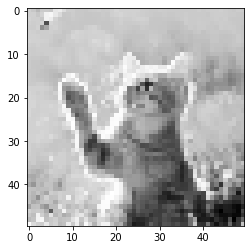

array([[[[197],
         [191],
         [179],
         ...,
         [192],
         [195],
         [194]],

        [[198],
         [198],
         [191],
         ...,
         [193],
         [192],
         [191]],

        [[201],
         [197],
         [197],
         ...,
         [191],
         [191],
         [190]],

        ...,

        [[191],
         [183],
         [226],
         ...,
         [ 36],
         [ 36],
         [ 70]],

        [[180],
         [188],
         [227],
         ...,
         [ 28],
         [ 69],
         [111]],

        [[233],
         [207],
         [197],
         ...,
         [ 57],
         [ 74],
         [188]]]], dtype=uint8)

In [58]:
# After building the model Question may arise is that ( How to use our trained model >>>? )
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

CATEGORIES = ['Dog' ,'Cat']
def prepare(filepath):
    IMG_SIZE=50
    try:
        img_array = cv2.imread(filepath , cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        plt.imshow(new_array, cmap = 'gray')
        plt.show()
        return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)
    except Exception as e:
        print(str(e))
        
prepare('cat1.jpg')

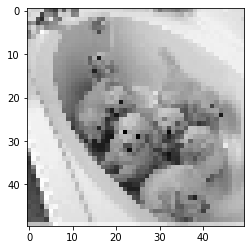

Cat


In [60]:
model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('dog3.jpg')])
print(CATEGORIES[int(prediction[0][0])])